In [27]:
from network import *
import sys
sys.path.append("../../project/src/markov_exposure/")
from inference import *
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
T,N = 100,50
symmetric=True

network = Network(N=N, dirichlet=0.5)

A0 = network.generate_A0(T=T, avg_degree=100, symmetric=symmetric)
for t in range(T): 
    assert(np.all(A0[t] == A0[t].T))
    
A1 = network.apply_exposure(A0, K_exp=3)

In [29]:
mu, Z, u, w = network.get_mu(), network.get_Z(), network.get_u(), network.get_w()

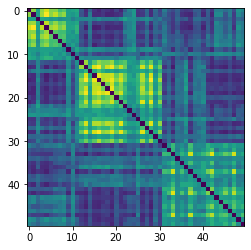

In [55]:
plt.imshow(A0.sum(axis=0))

In [57]:
seeds = [697752728, 4190089612, 1176914559, 3077924848, 315917623, 2544020234, 1077758578, 4071300106, 534591752, 3553386411]

## NoExp Inference asymmetric

In [69]:
for seed in seeds: 
    losses_noexp, theta_noexp = fit(A0, 3, 3, seed=seed, symmetric=False, exp=False)
    u_noexp,v_noexp,w_noexp = theta_noexp
    acc_u, acc_v = evaluate_memberships(u, u_noexp, u, v_noexp, verbose=False)[0:2]
    print_bold(f"seed={seed}: acc_v={acc_u}, acc_v={acc_v}")

running NoExp inference for 20000 iterations: 

No exposure inference with T=100, N=50, K=3 and 10001 iterations took 13.635909098999946 seconds

seed=697752728: acc_v=0.9969220172051599, acc_v=0.9965204793545843
running NoExp inference for 20000 iterations: 

No exposure inference with T=100, N=50, K=3 and 10001 iterations took 13.59947352600011 seconds

seed=4190089612: acc_v=0.9988542967849058, acc_v=0.9923212821212867
running NoExp inference for 20000 iterations: 

No exposure inference with T=100, N=50, K=3 and 10001 iterations took 13.913367649000065 seconds

seed=1176914559: acc_v=0.9965459609168958, acc_v=0.9976506296090514
running NoExp inference for 20000 iterations: 

No exposure inference with T=100, N=50, K=3 and 10001 iterations took 13.929862813 seconds

seed=3077924848: acc_v=0.991811094500879, acc_v=0.9962259650096342
running NoExp inference for 20000 iterations: 

No exposure inference with T=100, N=50, K=3 and 10001 iterations took 14.035182229000384 seconds

seed=31

## NoExp Inference symmetric

In [76]:
for seed in seeds: 
    losses_noexp, theta_noexp = fit(A0, 3,3, seed=seed, symmetric=True, exp=False)
    u_noexp,v_noexp,w_noexp = theta_noexp
    acc_u, acc_v = evaluate_memberships(u, u_noexp, u, v_noexp, verbose=False)[0:2]
    print_bold(f"seed={seed}: acc_u={acc_u}, acc_v={acc_v}")

running NoExp inference for 20000 iterations: 

No exposure inference with T=100, N=50, K=3 and 10001 iterations took 13.889576216999558 seconds

seed=697752728: acc_u=0.6989638320946644, acc_v=0.6989638320946644
running NoExp inference for 20000 iterations: 

No exposure inference with T=100, N=50, K=3 and 10001 iterations took 14.400128413000857 seconds

seed=4190089612: acc_u=0.891380367232303, acc_v=0.891380367232303
running NoExp inference for 20000 iterations: 

No exposure inference with T=100, N=50, K=3 and 10001 iterations took 14.153018857999996 seconds

seed=1176914559: acc_u=0.6852735648357275, acc_v=0.6852735648357275
running NoExp inference for 20000 iterations: 

No exposure inference with T=100, N=50, K=3 and 10001 iterations took 14.470002301000932 seconds

seed=3077924848: acc_u=0.6867495463018863, acc_v=0.6867495463018863
running NoExp inference for 20000 iterations: 

No exposure inference with T=100, N=50, K=3 and 10001 iterations took 14.493940713000484 seconds

s